In [23]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn import svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore")

In [2]:
heart_dataset = pd.read_csv("./heart.csv")
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
heart_dataset.shape

(1025, 14)

In [5]:
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
def summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

summary(heart_dataset, "target")

   target      Ratio
1     526  51.317073
0     499  48.682927
##########################################


In [7]:
heart_dataset.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


In [8]:
X = heart_dataset.drop(columns = 'target', axis=1)
Y = heart_dataset['target']

In [9]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [10]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [11]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(heart_dataset)

Observations: 1025
Variables: 14
cat_cols: 9
num_cols: 5
cat_but_car: 0
num_but_cat: 9


count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
5%         39.000000
10%        42.000000
20%        45.000000
30%        50.000000
40%        53.000000
50%        56.000000
60%        58.000000
70%        60.000000
80%        62.000000
90%        66.000000
95%        68.000000
99%        71.000000
max        77.000000
Name: age, dtype: float64


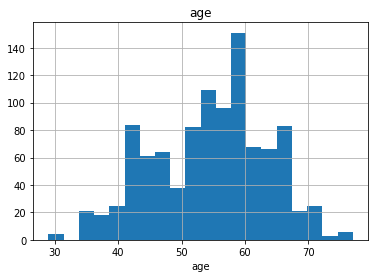

count    1025.000000
mean      131.611707
std        17.516718
min        94.000000
5%        108.000000
10%       110.000000
20%       120.000000
30%       120.000000
40%       126.000000
50%       130.000000
60%       134.000000
70%       140.000000
80%       144.000000
90%       152.000000
95%       163.200000
99%       180.000000
max       200.000000
Name: trestbps, dtype: float64


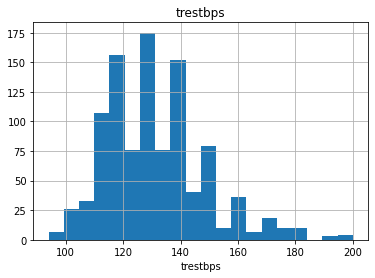

count    1025.00000
mean      246.00000
std        51.59251
min       126.00000
5%        175.00000
10%       187.00000
20%       204.00000
30%       217.20000
40%       229.00000
50%       240.00000
60%       254.00000
70%       268.00000
80%       286.00000
90%       309.00000
95%       330.00000
99%       407.00000
max       564.00000
Name: chol, dtype: float64


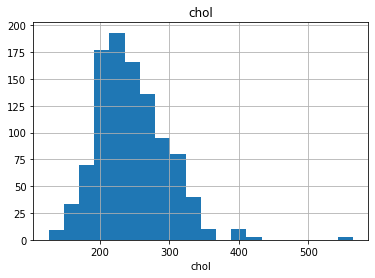

count    1025.000000
mean      149.114146
std        23.005724
min        71.000000
5%        108.000000
10%       115.000000
20%       129.800000
30%       140.000000
40%       145.000000
50%       152.000000
60%       158.000000
70%       163.000000
80%       170.000000
90%       175.000000
95%       182.000000
99%       192.000000
max       202.000000
Name: thalach, dtype: float64


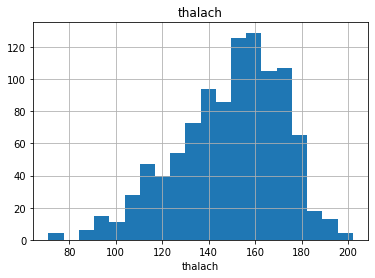

count    1025.000000
mean        1.071512
std         1.175053
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.400000
50%         0.800000
60%         1.200000
70%         1.500000
80%         2.000000
90%         2.800000
95%         3.400000
99%         4.352000
max         6.200000
Name: oldpeak, dtype: float64


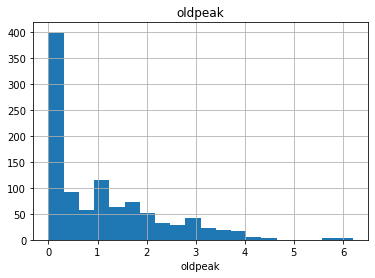

In [12]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()

for col in num_cols:
    num_summary(heart_dataset, col, plot=True)

In [13]:
heart_dataset.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


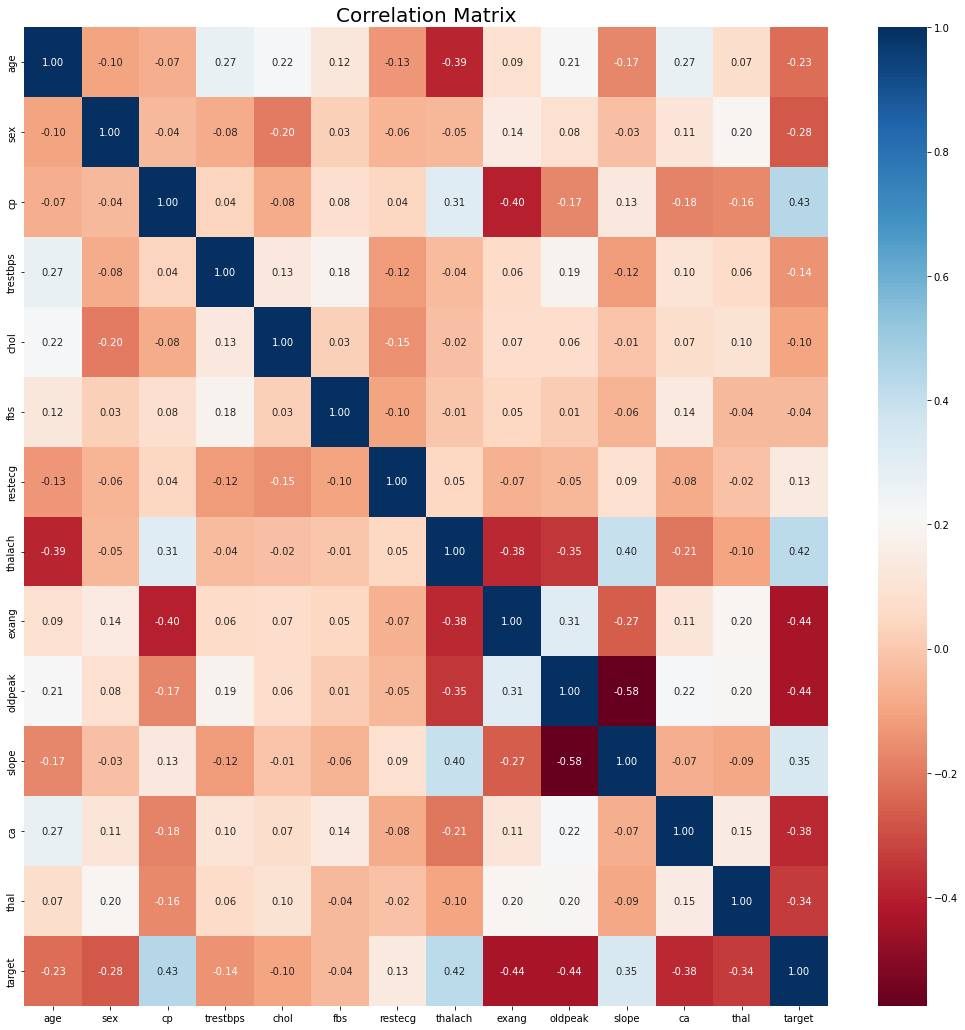

In [14]:
f, ax = plt.subplots(figsize=[18, 18])
sns.heatmap(heart_dataset.corr(), annot=True, fmt=".2f", ax=ax, cmap="RdBu")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show(block=True)

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [16]:
print(X.shape, X_train.shape, X_test.shape) 

(1025, 13) (820, 13) (205, 13)


In [24]:
model = LogisticRegression()

In [25]:
model.fit(X_train, Y_train)

LogisticRegression()

In [26]:
# accuracy on test data 
X_test_prediction = model.predict(X_test) 
test_data_accuracy = accuracy_score(X_test_prediction, Y_test) 

In [27]:
print('Accuracy on Test data : ', test_data_accuracy) 

Accuracy on Test data :  0.8048780487804879


In [28]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2) 
# change the input data to a numpy array 
input_data_as_numpy_array= np.asarray(input_data) 
# reshape the numpy array as we are predicting for only on instance 
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1) 
prediction = model.predict(input_data_reshaped) 
print(prediction) 
if (prediction[0]== 0): 
    print('The Person does not have a Heart Disease') 
else: print('The Person has Heart Disease') 

[0]
The Person does not have a Heart Disease


In [29]:
import pickle

In [31]:
filename = 'heart_disease_model.sav' 
pickle.dump(model, open(filename, 'wb')) 

In [32]:
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

In [33]:
for column in X.columns: print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
